In [1]:
import pandas as pd
import numpy as np

#df = pd.read_csv('DADOS/microdados_enem_2016.csv', encoding='ISO-8859-1', on_bad_lines='skip', sep=';', skiprows=lambda i: i>0 and random.random() > p)

sampled_chunks = []
chunk_size = 10000

# Read the CSV file in chunks and sample from each chunk
for chunk in pd.read_csv('DADOS/microdados_enem_2016.csv', chunksize = chunk_size, encoding='ISO-8859-1', on_bad_lines='skip', sep=';'):

    sampled_chunk = chunk.sample(frac=0.01)
    sampled_chunks.append(sampled_chunk)

# Concatenate the sampled chunks into a single DataFrame
df = pd.concat(sampled_chunks)


#data = np.gen_from_text('DADOS/microdados_enem_2016.csv', dtype='str', sep=)

In [2]:
df.describe()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,8.627200e+04,86272.0,86272.000000,82538.000000,86272.000000,86272.000000,86272.00000,86272.000000,86272.000000,18798.000000,...,47758.000000,47758.000000,86271.000000,86271.000000,86271.000000,86271.000000,86271.000000,86271.000000,86271.000000,24834.000000
mean,1.600043e+11,2016.0,6.274005,0.156049,2.139188,1.051790,1.69442,2.863270,1.255645,1.234440,...,4.510449,3.932242,4.612442,4.663572,3.301434,4.387639,3.637850,3.437273,4.396089,3.730048
std,2.490266e+06,0.0,4.200035,0.422768,1.009780,0.263073,0.92324,3.575301,0.515535,0.639192,...,1.034553,1.626497,0.975503,0.913048,1.754169,1.303643,1.764054,1.761581,1.240418,1.741779
min,1.600000e+11,2016.0,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.600022e+11,2016.0,3.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,1.600043e+11,2016.0,5.000000,0.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,1.600065e+11,2016.0,10.000000,0.000000,3.000000,1.000000,2.00000,5.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,1.600086e+11,2016.0,20.000000,3.000000,6.000000,4.000000,4.00000,10.000000,4.000000,3.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


age_ranges = {
    1: '<17',
    2: '17',
    3: '18',
    4: '19',
    5: '20',
    6: '21',
    7: '22',
    8: '23',
    9: '24',
    10: '25',
    11: '26-30',
    12: '31-35',
    13: '36-40',
    14: '41-45',
    15: '46-50',
    16: '51-55',
    17: '56-60', 
    18:'61-65', 
    19:'66-70', 
    20: '>70'
}

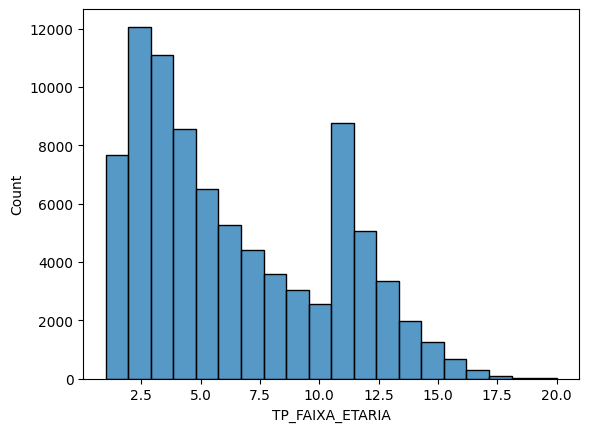

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='TP_FAIXA_ETARIA', bins=20)

# Show the plots
plt.show()

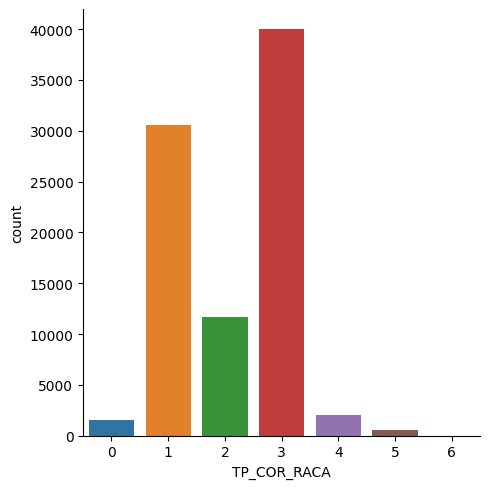

In [4]:
sns.catplot(x='TP_COR_RACA', kind='count', data=df)

Média geral das notas: 506.33


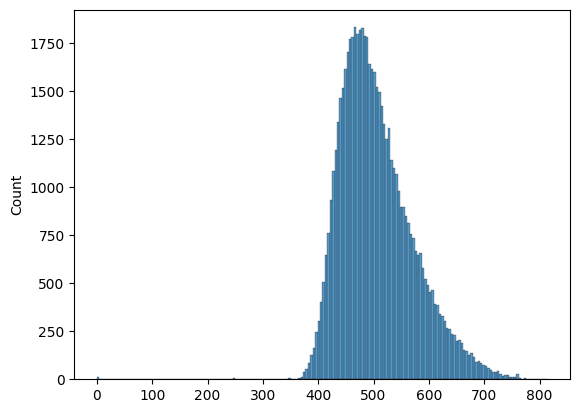

In [5]:
media_geral = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean().mean()

print(f'Média geral das notas: {media_geral:.2f}')

# Cria um gráfico de distribuição das médias das notas
sns.histplot(df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean(axis=1))

# Mostra o gráfico na tela
plt.show()

A distribuição das médias das notas de todas as provas segue uma curva normal


/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


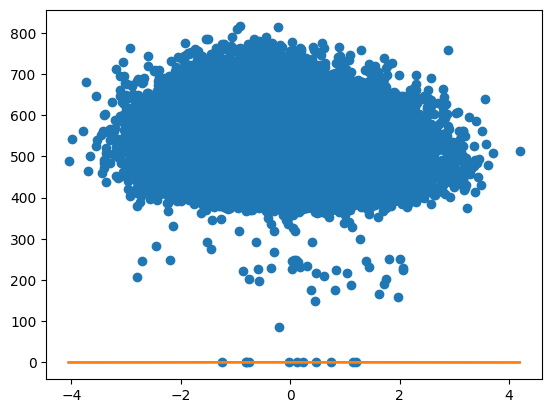

In [6]:
from scipy.stats import skew, kurtosis, shapiro, norm
notas_obj = df[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT"]]

# Calcula a média das notas de todas as provas para cada participante
media_notas = notas_obj.mean(axis=1)

# Calcula a skewness da distribuição das médias das notas de todas as provas
skewness = skew(media_notas)

# Calcula a kurtosis da distribuição das médias das notas de todas as provas
kurt = kurtosis(media_notas)

# Realiza o teste de Shapiro-Wilk para avaliar se a distribuição segue uma curva normal
stat, p = shapiro(media_notas)
if p > 0.05:
    print("A distribuição das médias das notas de todas as provas segue uma curva normal")
else:
    print("A distribuição das médias das notas de todas as provas não segue uma curva normal")

# Cria um gráfico Q-Q para comparar a distribuição com uma curva normal teórica
norm_data = norm.rvs(size=len(media_notas))
norm_data.sort()
plt.plot(norm_data, media_notas, "o")
plt.plot(norm_data, norm.pdf(norm_data), linewidth=2)
plt.show()


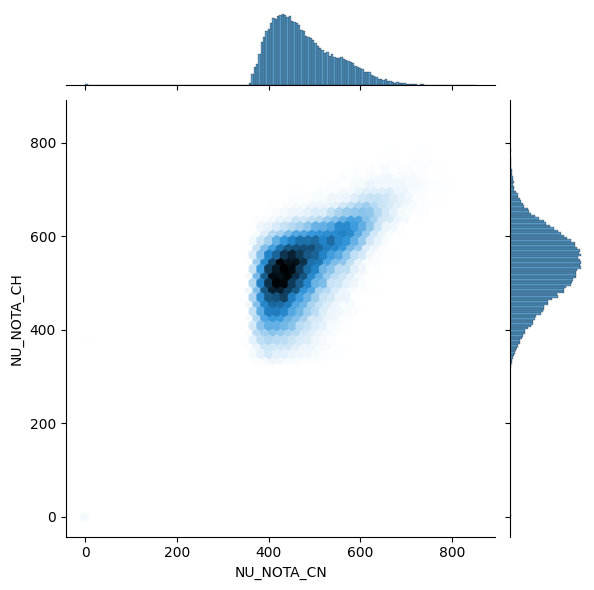

In [7]:
import pandas as pd
import seaborn as sns

# Seleciona as colunas relevantes
colunas = ["NU_NOTA_CN", "NU_NOTA_CH"]

# Cria o jointplot com as colunas selecionadas
sns.jointplot(x="NU_NOTA_CN", y="NU_NOTA_CH", data=df[colunas], kind="hex")

<AxesSubplot: xlabel='TP_ESCOLA', ylabel='MEDIA_NOTAS'>

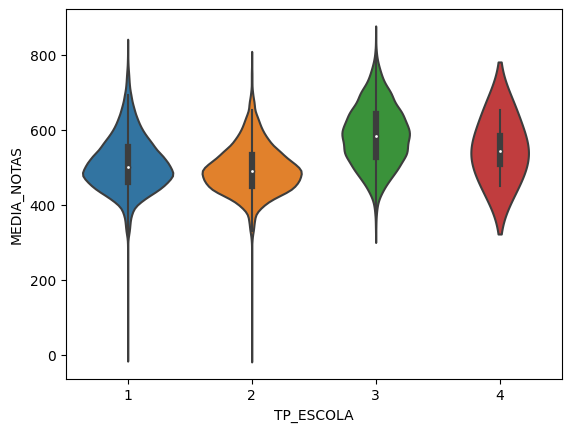

In [8]:
df["MEDIA_NOTAS"] = df[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

# Seleciona apenas as colunas relevantes
dados = df[["MEDIA_NOTAS", "TP_ESCOLA"]]

# Cria um gráfico com todos os violin plots para a média das notas, separados por tipo de escola
sns.violinplot(data=dados, x="TP_ESCOLA", y="MEDIA_NOTAS")

<AxesSubplot: xlabel='Q006', ylabel='MEDIA_NOTAS'>

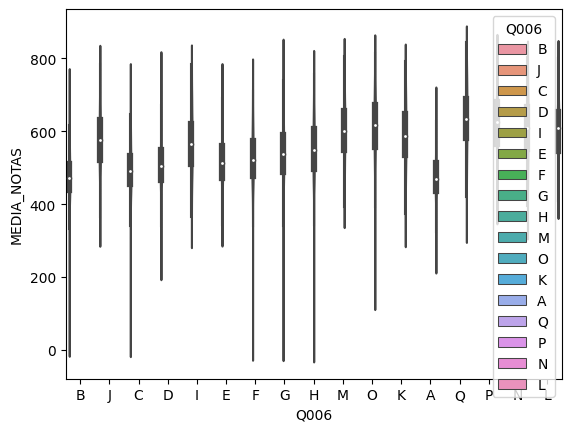

In [11]:
# Seleciona apenas as colunas relevantes
dados = df[["MEDIA_NOTAS","Q006"]]

# Cria um gráfico com todos os violin plots para a média das notas, separados por tipo de escola e renda
sns.violinplot(data=dados, x="Q006", y="MEDIA_NOTAS", hue="Q006")

/tmp/ipykernel_59832/3961874167.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socio['Q001'] = df_socio['Q001'].map(map_q001)
/tmp/ipykernel_59832/3961874167.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_socio['Q002'] = df_socio['Q002'].map(map_q002)
/tmp/ipykernel_59832/3961874167.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

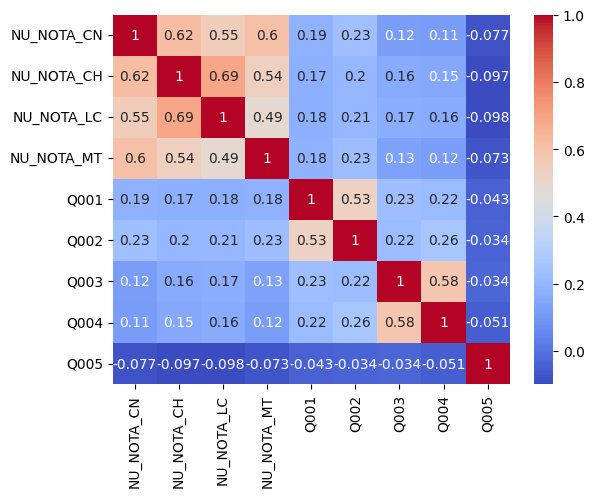

In [12]:
cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
        'Q001', 'Q002', 'Q003', 'Q004', 'Q005']

# Cria um DataFrame com essas colunas
df_socio = df[cols]

# Mapeia as respostas das perguntas sobre renda e escolaridade para valores numéricos
map_q001 = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7}
map_q002 = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 
            'F': 5, 'G': 6, 'H': 7, 
            'I':8,'J' :9,'K' :10,'L' :11,'M' :12,'N' :13,'O' :14,'P' :15}
map_q003 = {'A':0,'B' :1,'C' :2}
map_q004 = {'A' :0,'B' :1,'C' :2}

df_socio['Q001'] = df_socio['Q001'].map(map_q001)
df_socio['Q002'] = df_socio['Q002'].map(map_q002)
df_socio['Q003'] = df_socio['Q003'].map(map_q003)
df_socio['Q004'] = df_socio['Q004'].map(map_q004)

# Cria um gráfico de correlação entre as variáveis
sns.heatmap(df_socio.corr(), annot=True, cmap='coolwarm')

# Mostra o gráfico na tela
plt.show()

In [14]:
import sweetviz as sv

# Gera um relatório completo de análise exploratória com o Sweetviz
relatorio = sv.analyze(df)

# Salva o relatório em HTML
relatorio.show_html("relatorio_enem.html")

/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                                        | [  0%]…

/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a

/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.


/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/andremeneses/m

/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/andremeneses/miniconda3/envs/tf/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/andremeneses/m

Report relatorio_enem.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
